## Итоговая работа по курсу «Python и математика для анализа данных»

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import pandas_profiling
import seaborn as sns
import statistics as stats
%matplotlib inline

## Список задач

Проектная работа по модулю “Математика и статистика в Python”
1. Загрузить файл hr.csv.
2. Рассчитать основные статистики для переменных (среднее,медиана,мода,мин/макс,сред.отклонение).
3. Рассчитать и визуализировать корреляционную матрицу для переменных.
4. Визуализировать несколько взаимосвязей между переменными.
5. С использованием t-test статистики проверить взаимосвязи между несколькими переменными.
6. Рассчитать сколько работников работает в каждом департаменте.
7. Показать распределение сотрудников по зарплатам.
8. Показать распределение сотрудников по зарплатам совместно с департаментами.
9. Сколько сотрудников покинули компанию.
10. Проверить несколько гипотез для данных, чтобы понять почему сотрудники покидают компанию.
11. Загрузить результат (в формате .ipynb ноутбука) в репозиторий. Разместить ссылку на репозиторий в Личном кабинете

## Загрузить файл hr.csv

In [2]:
from IPython.display import Image

In [3]:
dataset = pd.read_csv('HR.csv')

In [4]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 10 columns):
satisfaction_level       14999 non-null float64
last_evaluation          14999 non-null float64
number_project           14999 non-null int64
average_montly_hours     14999 non-null int64
time_spend_company       14999 non-null int64
Work_accident            14999 non-null int64
left                     14999 non-null int64
promotion_last_5years    14999 non-null int64
sales                    14999 non-null object
salary                   14999 non-null object
dtypes: float64(2), int64(6), object(2)
memory usage: 1.1+ MB


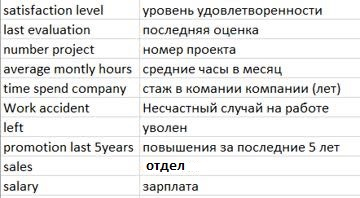

In [5]:
Image("description.jpg")

In [6]:
dataset.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,sales,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


## Рассчитать основные статистики для переменных (среднее,медиана,мода,мин/макс,сред.отклонение)

### basic

In [7]:
dataset.describe()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years
count,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000
mean,0.612834,0.716102,3.803054,201.050337,3.498233,0.144610,0.238083,0.021268
std,0.248631,0.171169,1.232592,49.943099,1.460136,0.351719,0.425924,0.144281
min,0.090000,0.360000,2.000000,96.000000,2.000000,0.000000,0.000000,0.000000
25%,0.440000,0.560000,3.000000,156.000000,3.000000,0.000000,0.000000,0.000000
50%,0.640000,0.720000,4.000000,200.000000,3.000000,0.000000,0.000000,0.000000
75%,0.820000,0.870000,5.000000,245.000000,4.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,7.000000,310.000000,10.000000,1.000000,1.000000,1.000000


In [8]:
dataset.median()

satisfaction_level         0.64
last_evaluation            0.72
number_project             4.00
average_montly_hours     200.00
time_spend_company         3.00
Work_accident              0.00
left                       0.00
promotion_last_5years      0.00
dtype: float64

In [9]:
dataset.select_dtypes(include='object').mode()

,sales,salary
0,sales,low


In [10]:
dataset.mode()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,sales,salary
0,0.1,0.55,4.0,135,3.0,0.0,0.0,0.0,sales,low
1,NaN,NaN,NaN,156,NaN,NaN,NaN,NaN,NaN,NaN


### pandas profile report

In [11]:
dataset.profile_report()

## Рассчитать и визуализировать корреляционную матрицу для переменных

In [12]:
corr_matrix = dataset.corr()
corr_matrix

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years
satisfaction_level,1.000000,0.105021,-0.142970,-0.020048,-0.100866,0.058697,-0.388375,0.025605
last_evaluation,0.105021,1.000000,0.349333,0.339742,0.131591,-0.007104,0.006567,-0.008684
number_project,-0.142970,0.349333,1.000000,0.417211,0.196786,-0.004741,0.023787,-0.006064
average_montly_hours,-0.020048,0.339742,0.417211,1.000000,0.127755,-0.010143,0.071287,-0.003544
time_spend_company,-0.100866,0.131591,0.196786,0.127755,1.000000,0.002120,0.144822,0.067433
Work_accident,0.058697,-0.007104,-0.004741,-0.010143,0.002120,1.000000,-0.154622,0.039245
left,-0.388375,0.006567,0.023787,0.071287,0.144822,-0.154622,1.000000,-0.061788
promotion_last_5years,0.025605,-0.008684,-0.006064,-0.003544,0.067433,0.039245,-0.061788,1.000000


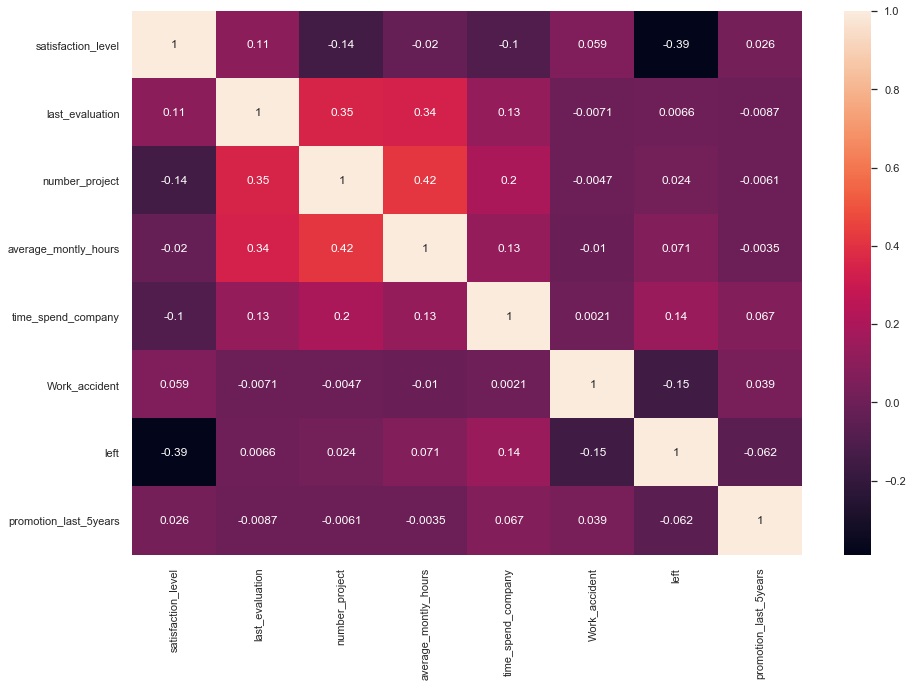

In [13]:
sns.set(rc=({'figure.figsize':(15, 10)}))
sns.heatmap(corr_matrix, annot=True, xticklabels=corr_matrix.columns.values, yticklabels=corr_matrix.columns.values)

## Визуализировать несколько взаимосвязей между переменными

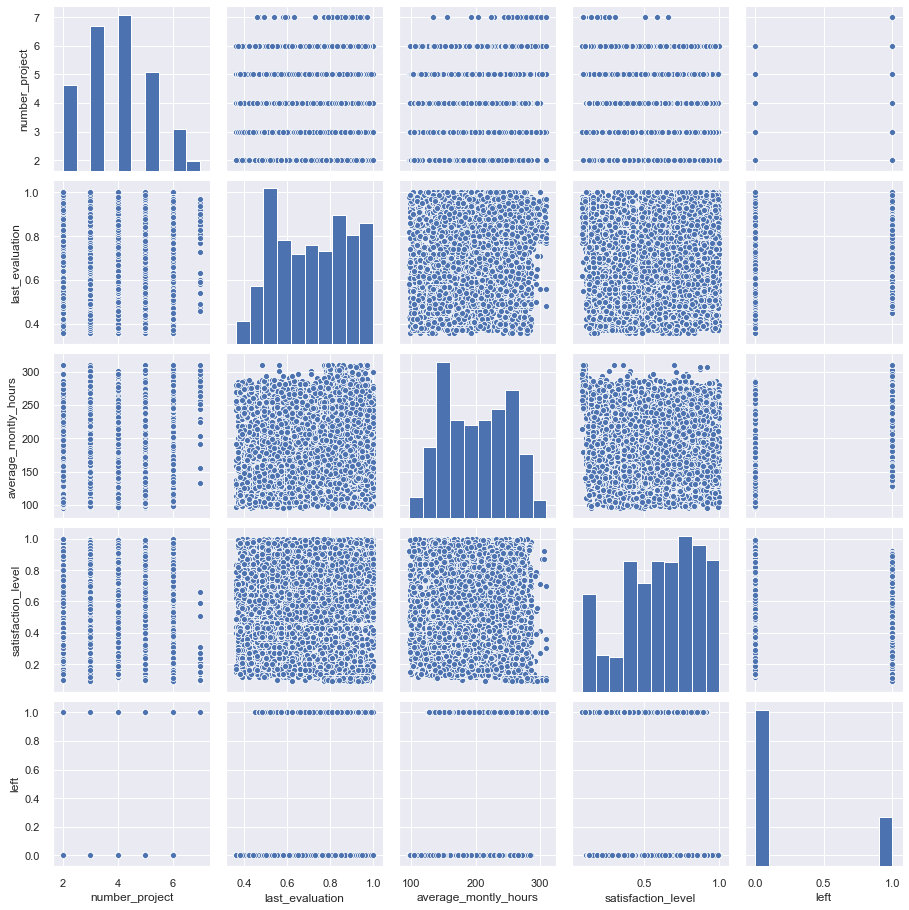

In [14]:
sns.pairplot(dataset,vars=['number_project', 'last_evaluation', 'average_montly_hours', 'satisfaction_level', 'left'], kind="scatter")

## С использованием t-test статистики проверить взаимосвязи между несколькими переменными

## Рассчитать сколько работников работает в каждом департаменте

In [15]:
pd.merge(
        dataset.sales.value_counts().to_frame().reset_index(),
        dataset.sales.value_counts(normalize=True).round(4).to_frame().reset_index(),
        how='left', on='index', suffixes=['_count', '_perc']
        )

,index,sales_count,sales_perc
0,sales,4140,0.2760
1,technical,2720,0.1813
2,support,2229,0.1486
3,IT,1227,0.0818
4,product_mng,902,0.0601
5,marketing,858,0.0572
6,RandD,787,0.0525
7,accounting,767,0.0511
8,hr,739,0.0493
9,management,630,0.0420


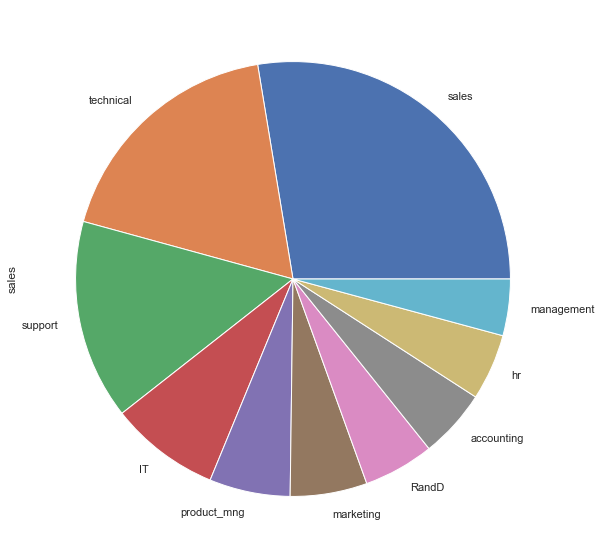

In [16]:
dataset.sales.value_counts().plot(kind='pie')

## Показать распределение сотрудников по зарплатам

In [17]:
pd.merge(
        dataset['salary'].value_counts().to_frame().reset_index(),
        dataset['salary'].value_counts(normalize=True).round(4).to_frame().reset_index(),
        how='left', on='index', suffixes=['_count', '_perc']
        )

,index,salary_count,salary_perc
0,low,7316,0.4878
1,medium,6446,0.4298
2,high,1237,0.0825


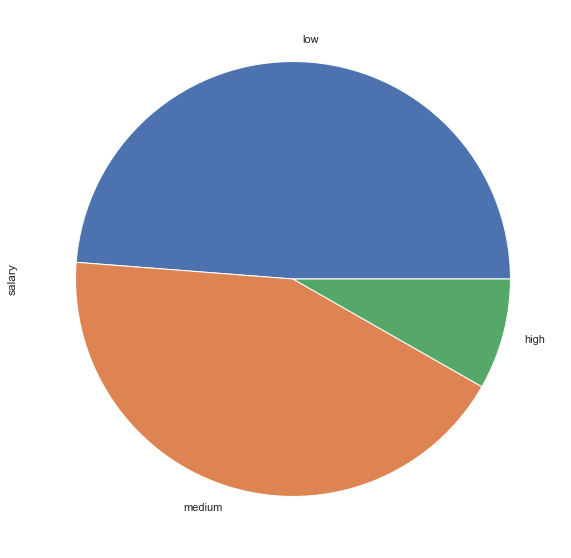

In [18]:
dataset.salary.value_counts().plot(kind='pie')

## Показать распределение сотрудников по зарплатам совместно с департаментами

In [19]:
dataset.groupby(['sales', 'salary'])['sales'].count().to_frame().unstack(level=-1)

sales             
salary       high   low medium
sales                         
IT             83   609    535
RandD          51   364    372
accounting     74   358    335
hr             45   335    359
management    225   180    225
marketing      80   402    376
product_mng    68   451    383
sales         269  2099   1772
support       141  1146    942
technical     201  1372   1147

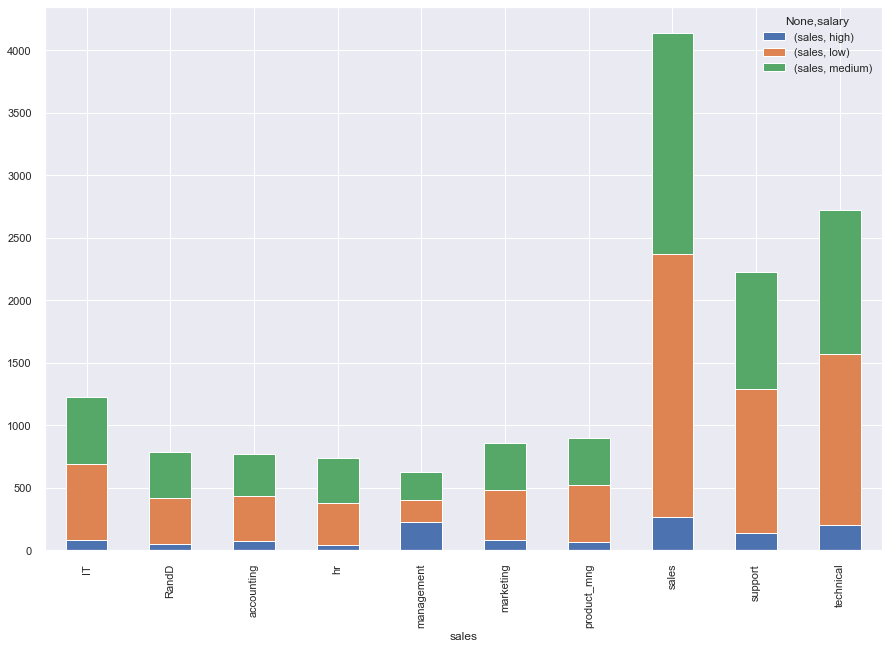

In [20]:
dataset.groupby(['sales', 'salary'])['sales'].count().to_frame().unstack(-1).plot(kind='bar', stacked=True)

In [21]:
dataset.groupby(['sales'])['salary'].value_counts(normalize=True).to_frame().unstack().round(3)

salary              
salary        high    low medium
sales                           
IT           0.068  0.496  0.436
RandD        0.065  0.463  0.473
accounting   0.096  0.467  0.437
hr           0.061  0.453  0.486
management   0.357  0.286  0.357
marketing    0.093  0.469  0.438
product_mng  0.075  0.500  0.425
sales        0.065  0.507  0.428
support      0.063  0.514  0.423
technical    0.074  0.504  0.422

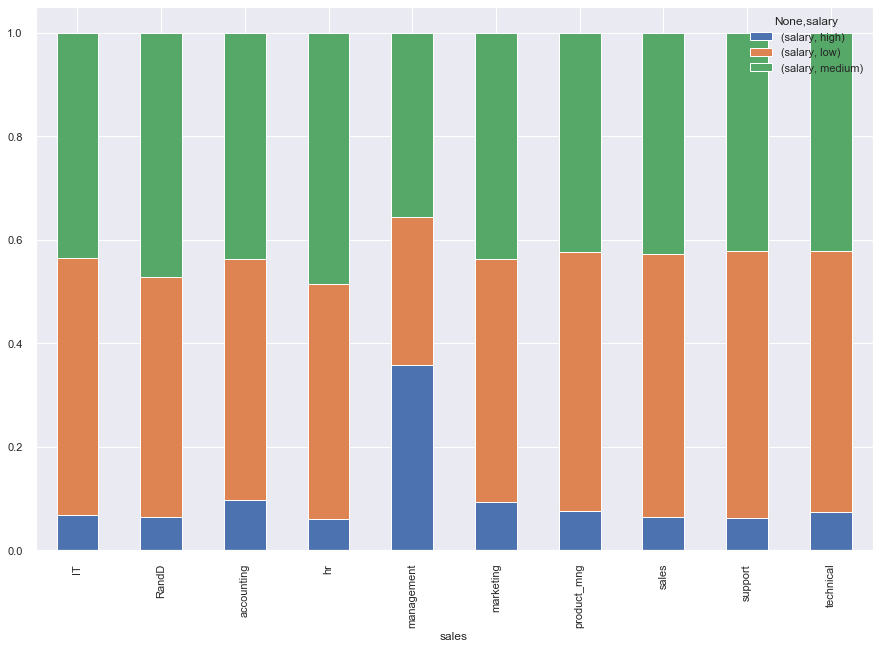

In [22]:
dataset.groupby(['sales'])['salary'].value_counts(normalize=True).to_frame().unstack().plot(kind='bar', stacked=True)

## Сколько сотрудников покинули компанию

In [23]:
dataset.left.sum()

3571

Компанию покинуло 3571 человек

## Проверить несколько гипотез для данных, чтобы понять почему сотрудники покидают компанию

In [25]:
employees_lefted = dataset[ dataset['left']==1 ]

In [28]:
employees_lefted

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,sales,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low
...,...,...,...,...,...,...,...,...,...,...
14994,0.40,0.57,2,151,3,0,1,0,support,low
14995,0.37,0.48,2,160,3,0,1,0,support,low
14996,0.37,0.53,2,143,3,0,1,0,support,low
14997,0.11,0.96,6,280,4,0,1,0,support,low
